<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

<h1><center>Machine Learning on Air Pollution PM2.5 Emission</center><h1>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Preprofiling](#Section5) <br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Linear Regression](#Section7)<br>

<a id = Section1></a>
# **1. Introduction**

### Overview
- Did you know air pollution kills around 7 million people worldwide every year?

- As per WHO data, 9 out of 10 people breathe air that contains higher levels of pollutants; and low-and-middle-income countries are at a threat of the highest exposures.

- Air pollution poses a major threat to health and climate, right from smog hanging over cities to smoke inside the home.

- The combined effects of ambient and household air pollution causes about 7 million premature deaths every year.

- These largely results in increased mortality from stroke, heart diseases, chronic obstructive pulmonary disease, lung cancer, and acute respiratory infections.

### 1.1 Major Air Pollutants

| **Pollutant**  | **Common Sources** | **Maximum Acceptable Concentration in the Atmosphere** |**Environmental Risks** | **Human Health Risks**|
| :-- | :-- | :-- | :-- | :--|
|**Carbon Monoxide (CO)**|Automobile emissions, fires, industrial processes |35 ppm (1-hour period); 9 ppm (8-hour period)|Contributes to smog formation |Exacerbates symptoms of heart disease, such as chest pain; may cause vision problems and reduce physical and mental capabilities in healthy people|
|**Nitrogen Oxides (NO and NO2)**|Automobile emissions, electricity generation, industrial processes|0.053 ppm (1-year period)|Damage to foliage; contributes to smog formation |Inflammation and irritation of breathing passages|
|**Sulfur dioxide (SO2)**|Electricity generation, fossil-fuel combustion, industrial processes, automobile emissions|0.03 ppm (1-year period); 0.14 ppm (24-hour period)|Major cause of haze; contributes to acid rain formation, which subsequently damages foliage, buildings, and monuments; reacts to form particulate matter|Breathing difficulties, particularly for people with asthma and heart disease|
|**Ozone (O3)**|Nitrogen oxides (NOx) and volatile organic compounds (VOCs) from industrial and automobile emissions, gasoline vapours, chemical solvents, and electrical utilities|0.075 ppm (8-hour period)|Interferes with the ability of certain plants to respire, leading to increased susceptibility to other environmental stressors (e.g., disease, harsh weather)|Reduced lung function; irritation and inflammation of breathing passages|
|**Particulate Matter**|Sources of primary particles include fires, smokestacks, construction sites, and unpaved roads; sources of secondary particles include reactions between gaseous chemicals emitted by power plants and automobiles|150 μg/m3 (24-hour period for particles <10 μm); 35 μg/m3 (24-hour period for particles <2.5 μm)|Contributes to formation of haze as well as acid rain, which changes the pH balance of waterways and damages foliage, buildings, and monuments|Irritation of breathing passages, aggravation of asthma, irregular heartbeat|

<a id = Section2></a>
# **2. Problem Statement**

**Currently, Beijing is suffering from:**

- China is notorious for being a major polluter. Its economic growth in the past three decades has been the fastest among major nations, which is the main factor in why China has extensive air pollution.
- China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.
- Air Pollution in Beijing is mainly dominated by coal combustion and vehicles running on the roads.
- With this amplified wealth, individuals are more capable of affording motor vehicles. The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.



**Airifi** is an air purifier company.
- One of the leading Global pollution controller organizations.
- The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.

**Current Scenario**
- As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to avoid global warming.
- Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the government of China.
- The company calculates pollution using traditional or manual methods, so it needs a model to do the long process.


- The target variable is **PM2.5**

Algorithm used here is **Linear Regression** as the problem statement describes it is a prediction model


<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [1]:
!pip install -q --upgrade pandas-profiling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

 <a id = Section4></a>
# **4. Dataset Feature Description** 

|**Column Name**|**Description**|
| :-- | :--
|**REF_NO**|Index of rows|
|**year**|Contains the year in which the data was Recorded|
|**month**|Contains the month of the year in which the data was Recorded|
|**day**|Contains the day of the month in which the data was Recorded|
|**hour**|Contains at what hour of the day the data was Recorded|
|**PM2.5**|**Atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers**|
|**PM10**|Atmospheric particulate matter (PM) that have a diameter less than 10 micrometers|
|**SO2**|SO2 concentration (ug/m^3)|
|**NO2**|NO2 concentration (ug/m^3)|
|**CO**|CO concentration (ug/m^3)|
|**O3**|Ozone concentration (ug/m^3)|
|**Temp**|temperature (degree Celsius)|
|**PRES**|pressure (hPa)|
|**DEWP**|dew point temperature (degree Celsius)|
|**RAIN**|RAIN in (mm)|
|**wd**|wind direction|
|**WSPM**|wind speed (m/s)|
|**station**|name of the air-quality monitoring site|

In [3]:
data_train=pd.read_csv(r'C:/Users/INTEL/Downloads/Air Quality of Beijing/beijing_train.csv')
data_train.shape

(403776, 18)

In [4]:
data_test=pd.read_csv(r'C:/Users/INTEL/Downloads/Air Quality of Beijing/beijing_test.csv')
data_test.shape

(16728, 17)

In [5]:
data_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


 ### 4.1 Data Description

In [6]:
print('Describe Feature Length:', len(data_train.describe().columns))
data_train.describe()

Describe Feature Length: 16


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Observation
- Maximum pollution caused by invisible air pollutants, like automobile emissions is around 23:00 hrs
- 75% air pollution are caused by the emission of sulfur dioxide, nitrogen dioxide, and carbon monoxide;  from fossil fuels such as fuel oil, gasoline, and natural gas that are burned in power plants, automobiles, and other combustion sources.
- On an average of 6 hrs, around 79.24μm PM2.5 are formed

### 4.2 Data Information  

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


**There are few missing values in the given dataset**

**In total there are 16 Numerical and 2 categorical data**

### **4.3 Numerical Data Distribution:**

- Plotting all **Numerical features to analyze the distribution** of their past.

In [8]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

#F2C44E


In [9]:
import random
color = "%06x" % random.randint(0, 0xFFFFFF)

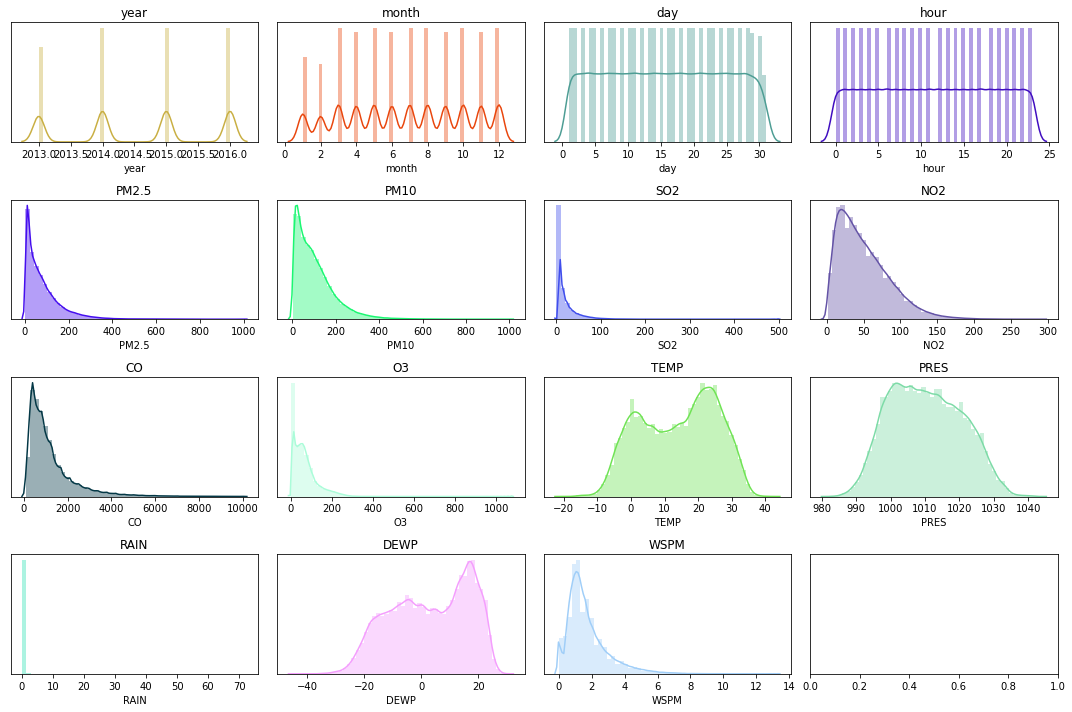

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(15, 10))
colors = []
for i in range(16):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
columns = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2','NO2','CO','O3',
           'TEMP', 'PRES', 'RAIN','DEWP', 'WSPM']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = data_train[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Postive Skewed Features: (Mean > Median):**
    - PM2.5
    - PM10
    - SO2
    - NO2
    - CO
    - O3
    - RAIN
    - WSPM
- **Negative Skewed Features: (Mean < Median):**
    - TEMP
    - PRES
    - DEWP

In [11]:
cat_list = []
for i in data_train.columns.values:
  if (data_train[i].dtype == 'object'):
    cat_list.append(i)
print('Total Categorical Features:', len(cat_list))
print("Categorical Features", cat_list)

Total Categorical Features: 2
Categorical Features ['wd', 'station']


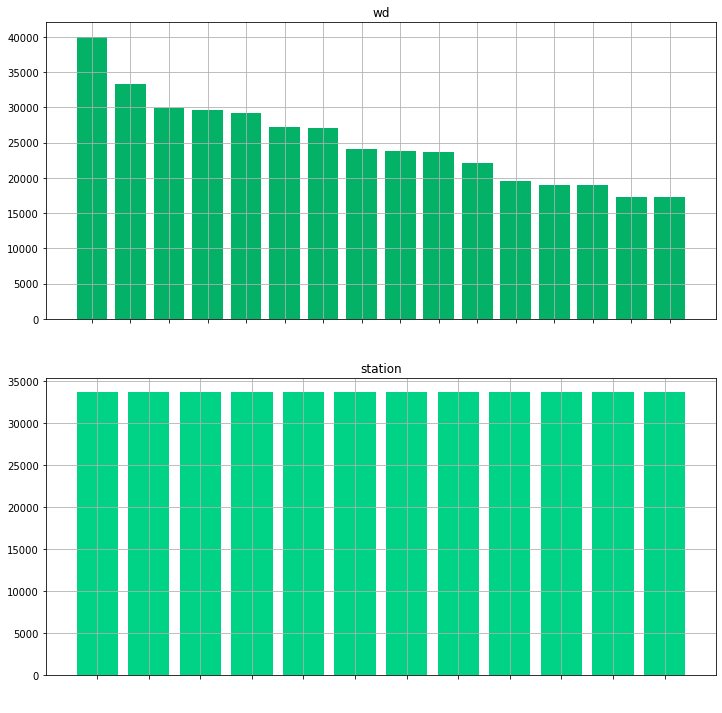

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = False, figsize=(12, 12))

colors = []
for i in range(2):
  colors.append('#%06X' % random.randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, cat_list, colors):
  ax.bar(x = data_train[col].value_counts().index, height = data_train[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observations:**

- **Normally distributed Mean=Median=Mode**
    - Station
- **Positively Skewed Mean < Median**
    - wd

**Handling Missing Data**

In [13]:
data_train.isnull().sum().sort_values(ascending=False)

CO         20261
O3         13007
NO2        11859
SO2         8776
PM2.5       8475
PM10        6222
wd          1389
DEWP         269
PRES         265
TEMP         264
RAIN         261
WSPM         238
month          0
year           0
station        0
day            0
hour           0
REF_NO         0
dtype: int64

**Replacing the missing values with Mean, Median, and Mode**

In [14]:
data_train['CO'].fillna(data_train['CO'].median(), inplace=True)
data_train['O3'].fillna(data_train['O3'].median(), inplace=True)
data_train['NO2'].fillna(data_train['NO2'].mean(), inplace=True)
data_train['SO2'].fillna(data_train['SO2'].median(), inplace=True)
data_train['PM2.5'].fillna(data_train['PM10'].median(), inplace=True)
data_train['PM10'].fillna(data_train['PM10'].median(), inplace=True)
data_train['DEWP'].fillna(data_train['DEWP'].mean(), inplace=True)
data_train['PRES'].fillna(data_train['PRES'].mean(), inplace=True)
data_train['TEMP'].fillna(data_train['TEMP'].mean(), inplace=True)
data_train['RAIN'].fillna(data_train['RAIN'].mean(), inplace=True)
data_train['WSPM'].fillna(data_train['WSPM'].median(), inplace=True)
data_train['wd'].fillna(data_train['wd'].mode()[0],inplace=True)

In [15]:
data_train.isnull().sum().sort_values(ascending=False)

station    0
WSPM       0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
REF_NO     0
dtype: int64

**Dropping the duplicate values**

In [16]:
duplicate=data_train.duplicated()
print(duplicate.sum())
data_train[duplicate]

0


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


**There are no duplicate values**

In [17]:
data_train.dtypes

REF_NO       int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

 <a id = Section6></a>
# **5. Pre Profiling**

In [ ]:
#import pandas preprofiling
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

<a id = Section6></a>
# **6. Exploratory Data Analysis**

In [18]:
print('Data Shape:', data_train.shape)
data_train.head()

Data Shape: (403776, 18)


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Question 1: Which is the most polluted year?**

In [19]:
data_train['year'].value_counts()

2016    105408
2015    105120
2014    105120
2013     88128
Name: year, dtype: int64

In [20]:
data_train['PM2.5'].mean()

79.32702141781584

In [21]:
year_air=data_train.pivot_table(index='year', values=['PM2.5'], aggfunc='mean')
year_air

,PM2.5
year,
2013,80.081875
2014,85.505623
2015,79.695042
2016,72.167179


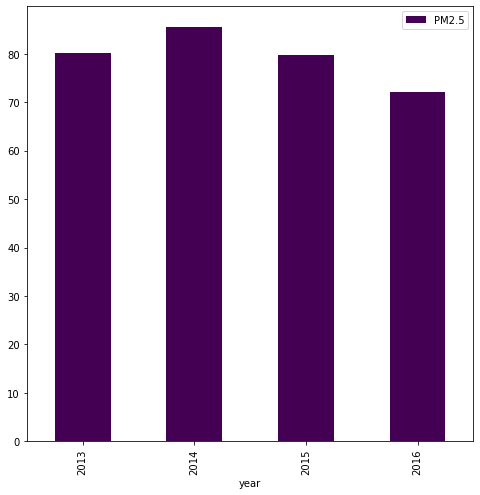

In [22]:
year_air.plot(kind='bar', figsize=(8,8), cmap='viridis')

 Year **2014** is the most polluted with the concentration of **85.50 μg/m3 Particulate Matter (PM2.5)**

**Question 2:Which month had the highest Pollution level?**

In [23]:
data_train['month'].value_counts()

12    35712
10    35712
8     35712
7     35712
5     35712
3     35712
11    34560
9     34560
6     34560
4     34560
1     26784
2     24480
Name: month, dtype: int64

In [24]:
month_air=data_train.pivot_table(index='month', values=['PM2.5'],columns=['year'], aggfunc='mean')
month_air

PM2.5                                    
year         2013        2014        2015        2016
month                                                
1             NaN   97.714270   96.234252   67.068996
2             NaN  145.552579   93.037587   43.210728
3      104.773073   95.027666   86.489617   91.805108
4       62.293634   90.540741   71.549167   67.577778
5       81.887321   62.324026   56.038262   54.400090
6      101.949016   55.249653   61.382708   59.106481
7       68.526322   89.828215   61.277778   68.602711
8       60.760865   63.592204   45.046707   46.135977
9       76.142130   66.577963   49.709606   55.565162
10      91.909610  117.786850   72.211358   84.146057
11      73.906250   86.862303  114.676620   97.430093
12      78.475806   59.441622  149.285730  128.798835

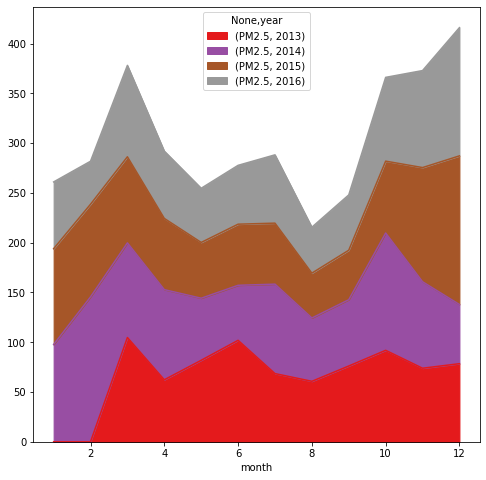

In [25]:
month_air.plot(kind='area', figsize=(8,8), cmap='Set1')

**Observations:**
- In 2013, March and June months were polluted on a large scale with PM2.5 levels of 104.77 and 101.94 μg/m3
- In 2014, Feburary and October months were polluted with a concentration of 145.55 and 117.78 μg/m3 PM2.5
- In 2015 and 2016, December month was polluted with PM2.5 levels of  149.28 and 128.79 μg/m3

**Question 3: What's the overall analysis of Pollutants in a day of the week?**

In [29]:
data_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [30]:
data_train['date']=pd.to_datetime(data_train[['year', 'month', 'day']])

In [31]:
data_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [32]:
import calendar

In [33]:
def findDay(date):
    dayname=calendar.day_name[date.weekday()]
    return dayname

In [35]:
data_train['day_week']=data_train['date'].apply(lambda x:findDay(x))
data_train

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,day_week
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,ESE,0.9,Wanshouxigong,2016-12-31,Saturday
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,ENE,0.7,Wanshouxigong,2016-12-31,Saturday
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,E,0.9,Wanshouxigong,2016-12-31,Saturday
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,SW,0.1,Wanshouxigong,2016-12-31,Saturday


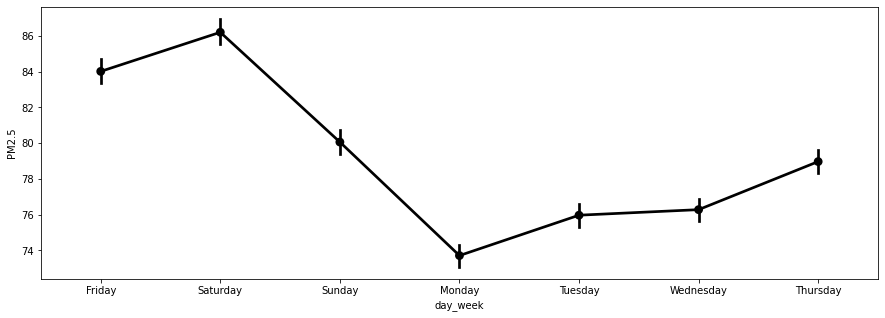

In [36]:
df = data_train[['PM2.5','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='day_week', y='PM2.5', data=data_train, color='black')

**Weekend has more exposure and generation of PM2.5**

**Question 4:Which station had the highest and lowest pollution level?**

In [37]:
data_train['station'].nunique()

12

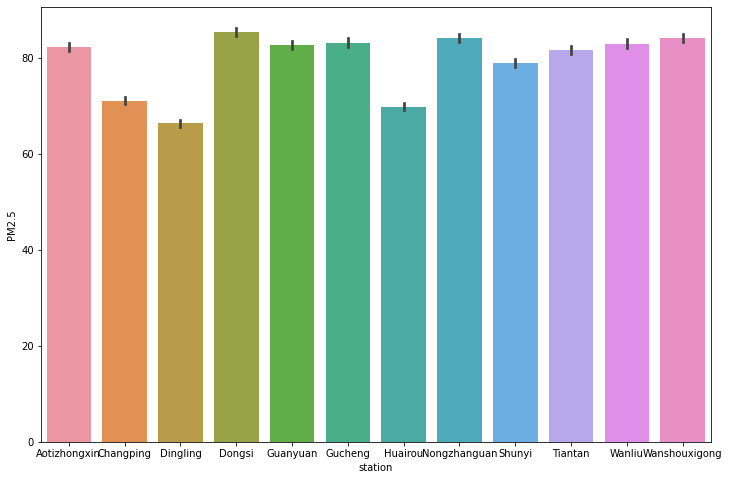

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x='station', y='PM2.5', data=data_train)

- **Dingling** is the station with lowest pollution level

- **Dongsi** is the station with highest pollution level

**Question 5: How O3 (Ozone Zone Layer) is affected by (PM2.5) Particulate Matter?**

In [39]:
data_train['O3'].nunique()

1597

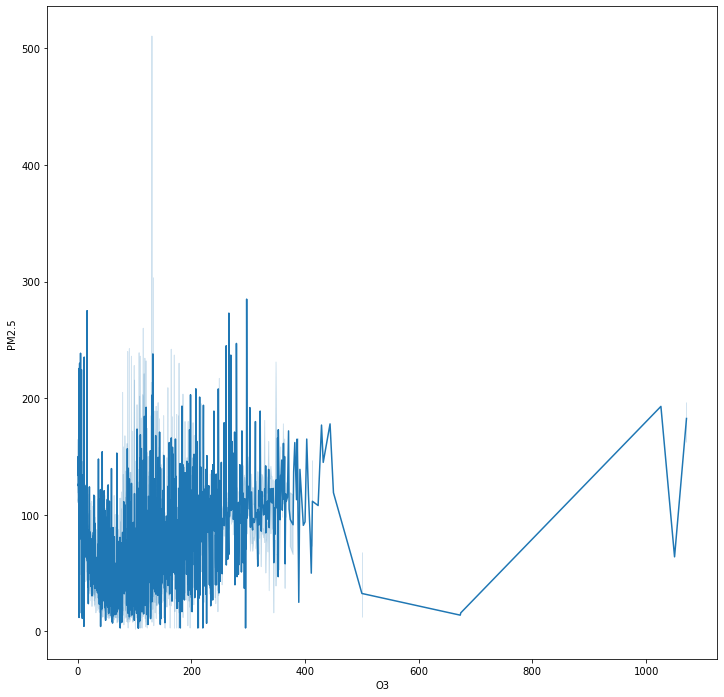

In [40]:
plt.figure(figsize=(12,12))
sns.lineplot(x='O3',y='PM2.5',data=data_train)

**PM2.5 – Tiny particles with a big impact**

- Ozone layer depletion causes increased UV radiation levels at the Earth's surface, which is damaging to human health. Negative effects include increases in certain types of skin cancers, eye cataracts and immune deficiency disorders. UV rays also affect plant growth, reducing agricultural productivity.

**Question 6: How secondary gases (CO,NO2,SO2) are related to Particulate Matter (PM2.5)?**

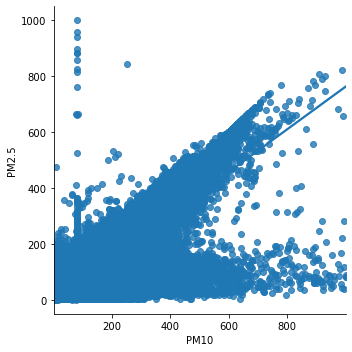

In [41]:
sns.lmplot(x="PM10", y="PM2.5", data=data_train);

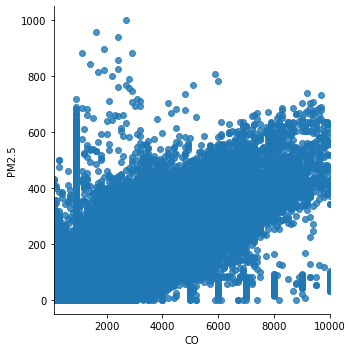

In [42]:
sns.lmplot(x='CO', y='PM2.5', data=data_train);

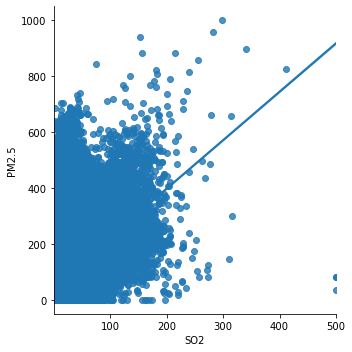

In [43]:
sns.lmplot(x='SO2',y='PM2.5', data=data_train);

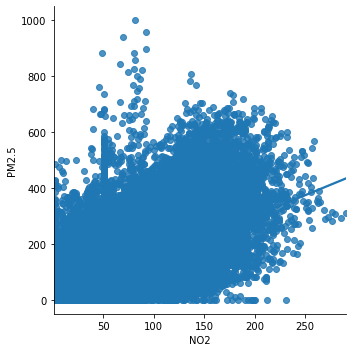

In [44]:
sns.lmplot(x='NO2',y='PM2.5', data=data_train);

**Question 7: How meteorological factors incluence the air pollutants?**

In [45]:
factors_air=data_train.pivot_table(index='PM2.5', values=['DEWP','PRES','RAIN','TEMP'], aggfunc='mean')
factors_air

,DEWP,PRES,RAIN,TEMP
PM2.5,,,,
2.0,-1.585714,1006.828571,0.000000,15.414286
3.0,-5.228291,1012.917403,0.073973,12.574181
4.0,-7.913487,1014.802214,0.032464,10.299383
4.3,-13.400000,1020.000000,0.000000,4.250000
4.4,-4.700000,1015.000000,0.000000,4.000000
...,...,...,...,...
882.0,-15.500000,1004.500000,0.000000,-2.400000
898.0,-15.100000,1009.900000,0.000000,-1.600000
941.0,-13.600000,1010.700000,0.000000,-3.900000


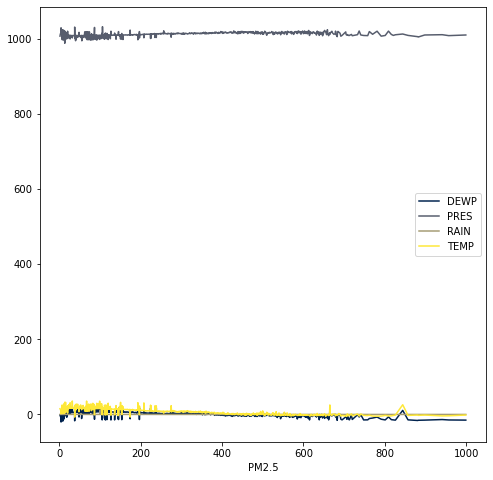

In [46]:
factors_air.plot(kind='line',figsize=(8,8), cmap='cividis')

**Question 8:Which meteorological factors are influencing the air pollutants?**

In [47]:
data_train['DEWP'].nunique()

646

In [48]:
data_train['TEMP'].nunique()

1188

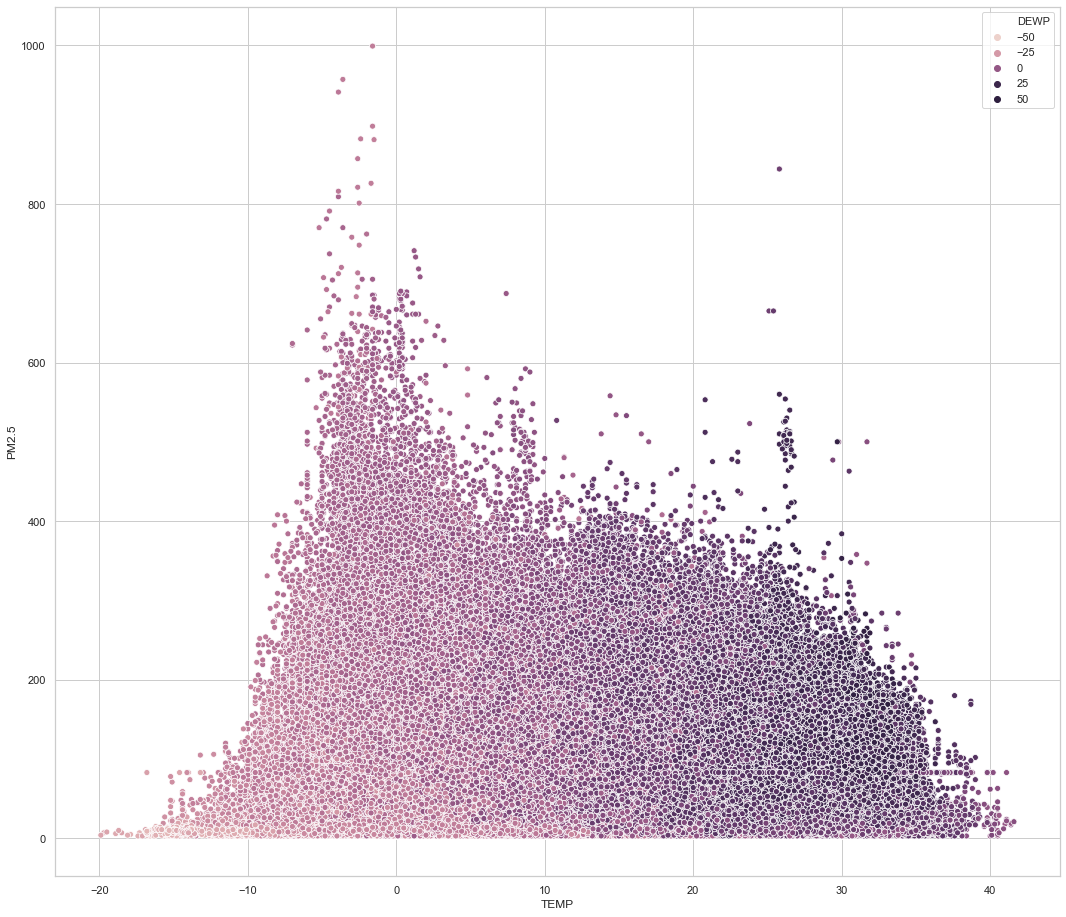

In [49]:
import seaborn
seaborn.set(style='whitegrid')
plt.figure(figsize=(18,16))
seaborn.scatterplot(x='TEMP', y='PM2.5', hue='DEWP', data=data_train)

**Relative humidity (DEWP) and Temperature (TEMP) are correlated with PM2.5**

**Question 9: What are the factors that are corelated with PM2.5?**

In [50]:
x=data_train.corr()
x

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
REF_NO,1.000000,0.967533,1.621958e-01,2.234730e-02,7.126473e-04,-0.037334,-0.053632,-0.249465,-0.064363,0.008302,-0.029459,-0.046865,0.125872,-0.023640,0.010728,0.042526
year,0.967533,1.000000,-9.152387e-02,-1.537495e-03,0.000000e+00,-0.044296,-0.049650,-0.196249,-0.080728,-0.009663,0.003572,-0.063533,0.111299,-0.077830,0.007890,0.077981
month,0.162196,-0.091524,1.000000e+00,8.481691e-03,2.272188e-21,0.023779,-0.021290,-0.218657,0.058973,0.069303,-0.129564,0.064885,0.057257,0.211431,0.012005,-0.136035
day,0.022347,-0.001537,8.481691e-03,1.000000e+00,4.219229e-18,0.019633,0.041252,-0.006772,0.024852,0.005704,-0.000979,0.011647,0.023890,0.025253,-0.004021,-0.017575
hour,0.000713,0.000000,2.272188e-21,4.219229e-18,1.000000e+00,0.013912,0.054024,0.032508,-0.002945,-0.027499,0.283928,0.143508,-0.038717,-0.011978,0.012516,0.142356
PM2.5,-0.037334,-0.044296,2.377926e-02,1.963299e-02,1.391196e-02,1.000000,0.871876,0.475528,0.648573,0.764263,-0.137291,-0.128371,0.020468,0.114895,-0.014165,-0.262913
PM10,-0.053632,-0.049650,-2.128957e-02,4.125176e-02,5.402407e-02,0.871876,1.000000,0.457414,0.637500,0.679981,-0.099300,-0.096467,-0.014110,0.064607,-0.027099,-0.173175
SO2,-0.249465,-0.196249,-2.186568e-01,-6.772061e-03,3.250767e-02,0.475528,0.457414,1.000000,0.492780,0.539765,-0.157674,-0.328612,0.229991,-0.276931,-0.040094,-0.099917
NO2,-0.064363,-0.080728,5.897253e-02,2.485195e-02,-2.944874e-03,0.648573,0.637500,0.492780,1.000000,0.680366,-0.461678,-0.280190,0.178037,-0.038602,-0.044096,-0.389228
CO,0.008302,-0.009663,6.930265e-02,5.704077e-03,-2.749917e-02,0.764263,0.679981,0.539765,0.680366,1.000000,-0.298988,-0.324886,0.189544,-0.062281,-0.012389,-0.286041


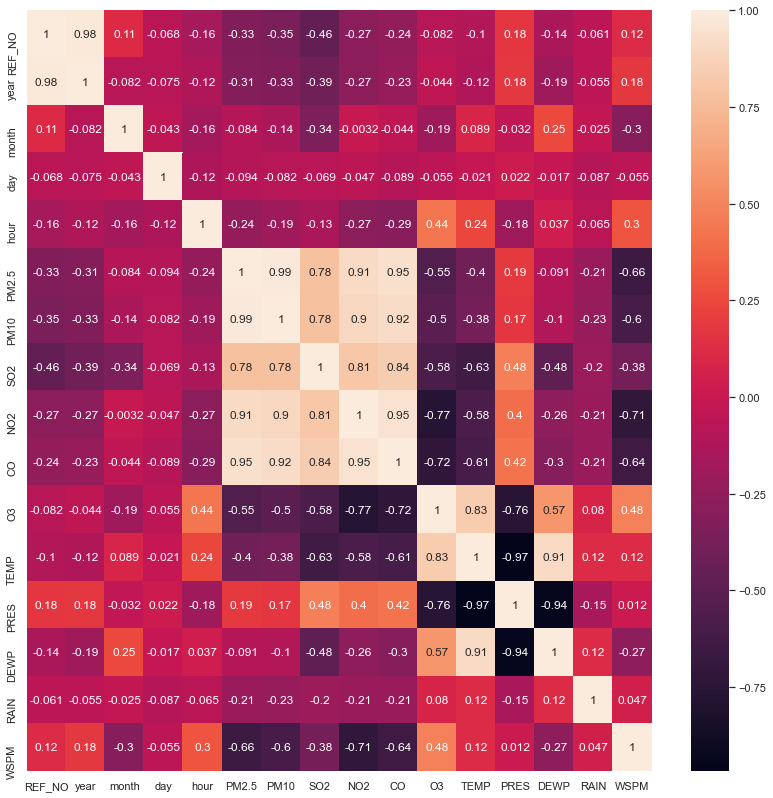

In [51]:
plt.figure(figsize=(14,14))
sns.heatmap(x.corr(), annot = True)

Factors that are postively correlated with **PM2.5**
- PM10
- NO2
- SO2

Factors that are negatively correlated with **PM2.5**
- PRES
- TEMP

## Overall Analysis:
- The exposure of PM2.5 is dependent on secondary gases, like 
    - Carbon Monoxide (cars, trucks and other vehicles or machinery that burn fossil fuels) 
    - SO2(burning of coal and oil)
    - NO2 (emitted from cars, trucks and buses, power plants, and off-road equipment)
    
- Ozone depletion occurs when chlorofluorocarbons (CFCs) and halons—gases formerly found in aerosol spray cans and refrigerants—are released into the atmosphere. CFCs and halons cause chemical reactions that break down ozone molecules, reducing ozone's ultraviolet radiation-absorbing capacity.




## **Future Insights:**
On Days when High Particle Levels are Expected, Take these Extra Steps to Reduce Pollution:
- Reduce the number of trips you take in your car.
- Reduce or eliminate fireplace and wood stove use.
- Avoid burning leaves, trash, and other materials.
- Avoid using gas-powered lawn and garden equipment.
- Modifying a production process to produce less waste. 
- Using non-toxic or less toxic chemicals as cleaners, degreasers and other maintenance chemicals. 
- Implementing water and energy conservation practices. 
- Reusing materials such as drums and pallets rather than disposing of them as waste.

<a id = Section7></a>
# 7. Introduction to Linear Regression

Linear regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things:

- Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
- Which variables in particular are significant predictors of the outcome variable, and in what way they do impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :
**y=β0+β1x**

What does each term represent?

- y is the response 
- x is the feature
- β0 is the intercept
- β1 is the coefficient for x


In [52]:
data_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,day_week
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday


In [53]:
data_train.shape

(403776, 20)

In [54]:
data_train.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.327021,103.999244,15.543248,50.352785,1199.044874,57.696709,14.088899,1010.282534,3.157291,0.067052,1.718192
std,9713.352953,1.097503,3.356479,8.808891,6.922195,78.313529,89.477795,21.539581,34.257473,1097.868685,56.491774,11.299838,10.353379,13.612736,0.837574,1.237624
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,37.000000,2.284800,24.000000,500.000000,12.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.000000,7.000000,44.000000,900.000000,45.000000,15.400000,1009.800000,4.100000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,82.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [55]:
data_train.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'date', 'day_week'],
      dtype='object')

### Preparing X and y using pandas

In [56]:
data_train[ ['REF_NO','year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'] ]

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,ESE,0.9,Wanshouxigong
403772,33645,2016,12,31,20,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,ENE,0.7,Wanshouxigong
403773,33646,2016,12,31,21,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,E,0.9,Wanshouxigong
403774,33647,2016,12,31,22,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,SW,0.1,Wanshouxigong


In [57]:
feature_cols = ['REF_NO','year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']                 
X = data_train[feature_cols]

In [58]:
X.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [82]:
columns= ['year','PM2.5','PM10','SO2','NO2','O3','TEMP','PRES','DEWP']
columns

['year', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']

In [83]:
features= ['year','PM10','SO2','NO2','O3','TEMP','PRES','DEWP']
features

['year', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']

In [84]:
X=data_train[features]
X.head()

,year,PM10,SO2,NO2,O3,TEMP,PRES,DEWP
0,2013,4.0,4.0,7.0,77.0,-0.7,1023.0,-18.8
1,2013,8.0,4.0,7.0,77.0,-1.1,1023.2,-18.2
2,2013,7.0,5.0,10.0,73.0,-1.1,1023.5,-18.2
3,2013,6.0,11.0,11.0,72.0,-1.4,1024.5,-19.4
4,2013,3.0,12.0,12.0,72.0,-2.0,1025.2,-19.5


In [85]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(403776, 8)


In [86]:
y = data_train['PM2.5']

In [87]:
y.head()

0    4.0
1    8.0
2    7.0
3    6.0
4    3.0
Name: PM2.5, dtype: float64

In [88]:
y.shape

(403776,)

In [89]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(403776,)


#### Splitting X and y into training and test datasets.

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler() 
scalar.fit(X_train) 
X_train_s=scalar.transform(X_train)
X_test_s=scalar.transform(X_test)

### Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:

   1. Load the algorithm
   2. Instantiate and Fit the model to the training dataset
   3. Prediction on the test set
   4. Calculating Root mean square error The code block given below shows how these steps are carried out:

  - linreg = LinearRegression()
  - linreg.fit(X_train, y_train) 
  - RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))



In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###  Interpreting Model Coefficients

In [93]:
regressor.intercept_

-3724.8011881182447

In [94]:
regressor.coef_ 

array([ 1.68106786,  0.63223059,  0.37942299,  0.22763695,  0.10956432,
       -1.97523781,  0.34613839,  1.9788508 ])

In [96]:
features

['year', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']

In [97]:
features.insert(0,'Intercept')
features

['Intercept', 'year', 'PM10', 'SO2', 'NO2', 'O3', 'TEMP', 'PRES', 'DEWP']

In [98]:
coef = regressor.coef_.tolist()
coef

[1.681067862014278,
 0.6322305897578359,
 0.37942299025627313,
 0.22763695203238574,
 0.10956432357247686,
 -1.97523780972299,
 0.34613839098351606,
 1.9788508025683185]

In [99]:
coef.insert(0, regressor.intercept_)
coef

[-3724.8011881182447,
 1.681067862014278,
 0.6322305897578359,
 0.37942299025627313,
 0.22763695203238574,
 0.10956432357247686,
 -1.97523780972299,
 0.34613839098351606,
 1.9788508025683185]

In [100]:
eq1 = zip(features, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -3724.8011881182447
year 1.681067862014278
PM10 0.6322305897578359
SO2 0.37942299025627313
NO2 0.22763695203238574
O3 0.10956432357247686
TEMP -1.97523780972299
PRES 0.34613839098351606
DEWP 1.9788508025683185


##### y = (-3724.8011881182447) + 1.681067862014278 * Year + 0.6322305897578359 * PM10 + 0.37942299025627313 * SO2 + 0.22763695203238574 * NO2 + 0.10956432357247686 * O3 + (-1.97523780972299)* TEMP + PRES * 0.34613839098351606 + DEWP * 1.9788508025683185


### Using the Model for Prediction

In [101]:
y_pred_train = regressor.predict(X_train)

In [102]:
y_pred_test = regressor.predict(X_test)

In [104]:
y_pred_train

array([ 23.01575654, 143.7839842 ,  41.6622988 , ..., -16.75663504,
       -18.15759132,  42.08414889])

In [105]:
y_pred_test

array([ 34.71300285, 163.68791295, 212.17773323, ...,   0.82083651,
        45.11821772, 239.69395323])

In [106]:
X_test.head()

,year,PM10,SO2,NO2,O3,TEMP,PRES,DEWP
160588,2016,20.0,9.0,65.0,7.0000,-2.5,1021.3,-9.9
260466,2016,198.0,15.0,93.0,16.0000,-0.1,1019.2,-3.7
1772,2013,255.0,75.0,81.0,125.0000,19.4,996.6,12.4
145027,2014,97.0,12.0,37.0,132.0000,18.6,1009.1,4.7
207804,2013,269.0,27.0,78.0,62.9748,13.0,1012.4,5.6


In [126]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler() # defining object
scalar.fit(X_train) #defining the scal
X_train_s=scalar.transform(X_train)#actual scaling
X_test_s=scalar.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_s, y_train) #calculates B0 and B1
y_pred_train_lg=linreg.predict(X_train_s)
y_pred_test_lg=linreg.predict(X_test_s)

In [109]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -45.71015660437044
Coefficients: [   5.04320359  630.33389799  189.60313192   65.78104676  117.31992187
 -121.4771253    20.90675882  143.46668319]


In [110]:
features.insert(0,'Intercept')# Appending the columns to show the B values side by side
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)

In [111]:
eq1 = zip(features, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -45.71015660437044
Intercept 5.0432035860372455
year 630.3338979885862
PM10 189.6031319221264
SO2 65.78104675812989
NO2 117.3199218680102
O3 -121.47712529796388
TEMP 20.906758815404544
PRES 143.46668318620306


Text(0, 0.5, 'Predicted PM2.5 Values')

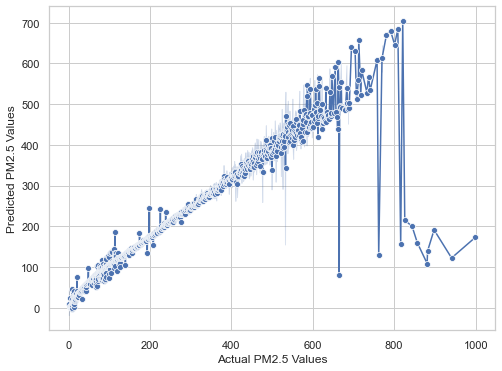

In [112]:
plt.figure(figsize=(8,8))
plt.axes(aspect='equal')
sns.lineplot(y_train, y_pred_train_lg, marker='o')
plt.xlabel('Actual PM2.5 Values')
plt.ylabel('Predicted PM2.5 Values')

Text(0, 0.5, 'Predicted PM2.5 Values')

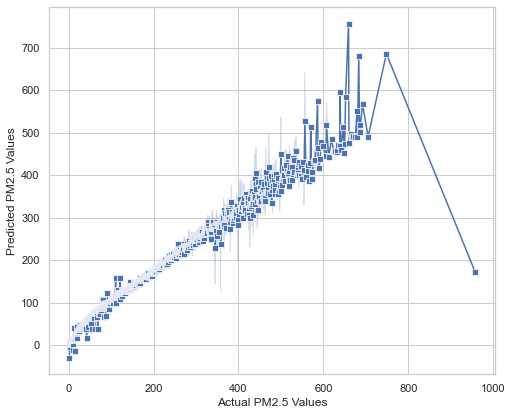

In [113]:
plt.figure(figsize=(8,22))
plt.axes(aspect='equal')
sns.lineplot(y_test, y_pred_test_lg, marker='s')
plt.xlabel('Actual PM2.5 Values')
plt.ylabel('Predicted PM2.5 Values')

# Model evaluation

Error is the deviation of the values predicted by the model with the true values.
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.
Below are the types of error we will be calculating for our linear regression model:

   - Mean Absolute Error
   - Mean Squared Error
   - Root Mean Squared Error



### Model Evaluation using metrics.

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
#finding RMSE values
from sklearn import metrics
RMSE_train_lg=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_lg))
print('the Root Mean Squared Error for Train data is  :',RMSE_train_lg)

the Root Mean Squared Error for Train data is  : 34.260332612144396


In [118]:
from sklearn import metrics
RMSE_test_lg=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lg))
print('the Root Mean Squared Error for Test data is  :',RMSE_test_lg)

the Root Mean Squared Error for Test data is  : 34.46384438362088


 ##### R Squared

In [119]:
from sklearn.metrics import r2_score
r2_train_lg=r2_score(y_train, y_pred_train_lg)
print('The R-square value for Train dataset is  :', r2_train_lg)

The R-square value for Train dataset is  : 0.809259670768049


In [120]:
from sklearn.metrics import r2_score
r2_test_lg=r2_score(y_test, y_pred_test_lg)
print('The R-square value for Test dataset is  :', r2_test_lg)

The R-square value for Test dataset is  : 0.8036716260858743


##### Adjusted R-Square 

In [121]:
def Adjusted_r2(r_square,N): 
    return(1-(((1-r_square)*(N-1))/(N-6)))

In [122]:
adj_r2_train=Adjusted_r2(r2_train_lg,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_test_lg,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.8092567182593462
The Adjusted R-square of Linear Regression Test Dataset is : 0.8036594695302139


In [123]:
X_train.shape[-1]

8

**From the above RMSE and R-squared values, we ca say that the model is very accurate with the accuracy of 80% for train and test dataset**

### Summary of Linear Regression

We have the equation for linear regression for PM2.5 as ;

#### y = (-3724.8011881182447) + 1.681067862014278 * Year + 0.6322305897578359 * PM10 + 0.37942299025627313 * SO2 + 0.22763695203238574 * NO2 + 0.10956432357247686 * O3 + (-1.97523780972299)* TEMP + PRES * 0.34613839098351606 + DEWP * 1.9788508025683185

From the above linear regression equation, we have observed the following;

   - The PM2.5 emissions are highly dependent on secondary gases. 
   - The PM2.5 Emissions are also dependent on meterological factors as well. 
    
After evaluating this model, we have the following results

|RMSE Score Train||RMSE Score Test ||R-square Value Train||R-square Value Test|| Adjusted R-squared Value Train||Adjusted R-squared Value test|
|------------||-------------||------||-------------||-----------||---------|
| 34.26  ||34.46|| 0.8092   ||0.8036|| 0.8092||   0.8036|
